## Estadistica Aplicada
Seccion 15 - 20 oct 2023

Francisco Humberto Villegas Reyna 1731722 gpo43

In [1]:
## basicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
## especializadas 
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf, plot_predict

## arima
from statsmodels.tsa.arima.model import ARIMA

## diagnostico del orden arima
import pmdarima as pm

In [2]:
pip install pmdarima

     ---------------------------------------- 0.0/566.2 kB ? eta -:--:--
     -- ---------------------------------- 30.7/566.2 kB 660.6 kB/s eta 0:00:01
     ---- -------------------------------- 61.4/566.2 kB 656.4 kB/s eta 0:00:01
     ------ ------------------------------ 92.2/566.2 kB 655.4 kB/s eta 0:00:01
     ------- ---------------------------- 112.6/566.2 kB 656.4 kB/s eta 0:00:01
     ------- ---------------------------- 112.6/566.2 kB 656.4 kB/s eta 0:00:01
     ------- ---------------------------- 112.6/566.2 kB 656.4 kB/s eta 0:00:01
     ------- ---------------------------- 112.6/566.2 kB 656.4 kB/s eta 0:00:01
     --------- -------------------------- 143.4/566.2 kB 369.8 kB/s eta 0:00:02
     --------- -------------------------- 153.6/566.2 kB 366.6 kB/s eta 0:00:02
     ------------ ----------------------- 194.6/566.2 kB 393.0 kB/s eta 0:00:01
     -------------- --------------------- 235.5/566.2 kB 436.6 kB/s eta 0:00:01
     ---------------- ------------------- 256.0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [8]:
##datos
df_amazon=pd.read_excel('amazon.xlsx')

In [9]:
df_amazon.head()

,fecha,amazon
0,2015-01-02,24.573591
1,2015-01-05,23.830631
2,2015-01-06,24.070295
3,2015-01-07,24.453760
4,2015-01-08,24.301968


In [10]:
df_amazon.tail()

,fecha,amazon
1250,2019-12-23,52.589653
1251,2019-12-24,52.599163
1252,2019-12-26,52.561153
1253,2019-12-27,52.865196
1254,2019-12-30,51.478008


In [14]:
ultima_obs=df_amazon.loc[1254]
df_amazon=df_amazon.loc[:1253]

In [15]:
ultima_obs

fecha     2019-12-30 00:00:00
amazon              51.478008
Name: 1254, dtype: object

In [16]:
df_amazon.tail()

,fecha,amazon
1249,2019-12-20,54.128864
1250,2019-12-23,52.589653
1251,2019-12-24,52.599163
1252,2019-12-26,52.561153
1253,2019-12-27,52.865196


In [17]:
## variable de tiempo
## variable tiempo debe ser index
## frecuencia asignada
df_amazon.dtypes

fecha     datetime64[ns]
amazon           float64
dtype: object

In [18]:
## convertir en index 
df_amazon=df_amazon.set_index('fecha')

In [19]:
## asignar frecuencia
## los precios los tenemos por dias habiles
## dias habiles --- bussiness days

df_amazon=df_amazon.asfreq('B')

In [20]:
df_amazon.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19',
               '2019-12-20', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27'],
              dtype='datetime64[ns]', name='fecha', length=1301, freq='B')

<Axes: xlabel='fecha'>

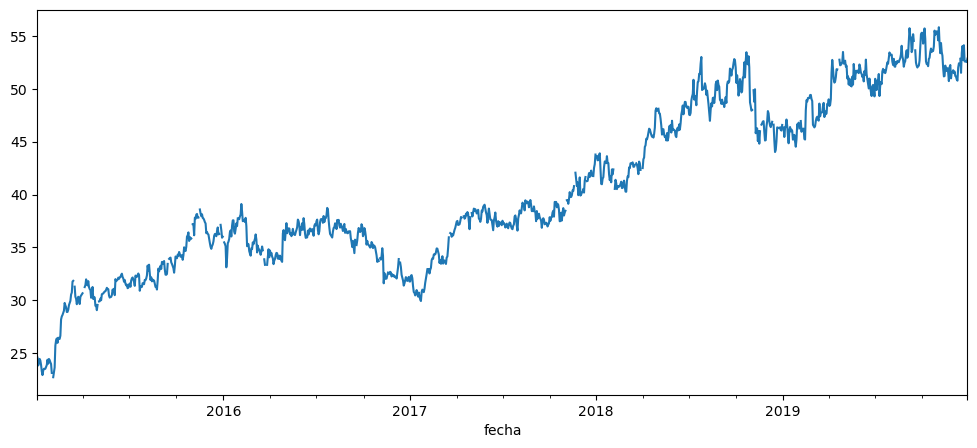

In [21]:
## graficar
df_amazon['amazon'].plot(figsize=(12,5))

In [22]:
df_amazon.isnull().sum()

amazon    47
dtype: int64

In [23]:
## rellenar los missing values

df_amazon['amazon']=df_amazon['amazon'].fillna(method='pad')

<Axes: xlabel='fecha'>

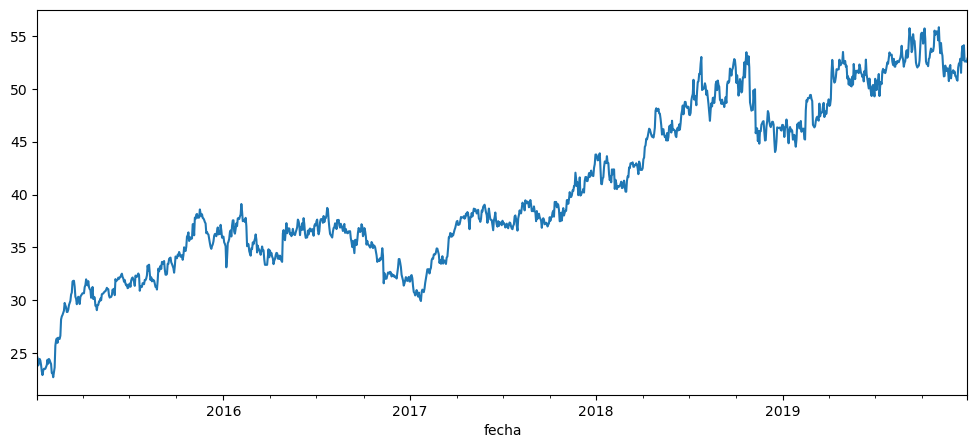

In [24]:
## graficar
df_amazon['amazon'].plot(figsize=(12,5))

los precios de la accion de amazon se comportan como una caminata aleatoria y por lo tanto deberia ser un proceso no estacionario

In [25]:
## prueba de dickyFuller aumentada
## Ho: No estacionaria
## Ha: Estacionaria

pruebra_ADF=adfuller(df_amazon['amazon']) 
pvalue=pruebra_ADF[1]
pvalue.round(2)

0.52

No se rechaza H0, significa que el precio de la accion de amazon es una serie **no estacionaria**


In [26]:
## aplicar 1ras diferencias al precio de la accion de amazon

df_amazon['amazon_dif']=df_amazon['amazon'].diff()


In [27]:
df_amazon.head()

,amazon,amazon_dif
fecha,,
2015-01-02,24.573591,NaN
2015-01-05,23.830631,-0.742960
2015-01-06,24.070295,0.239664
2015-01-07,24.453760,0.383465
2015-01-08,24.301968,-0.151793


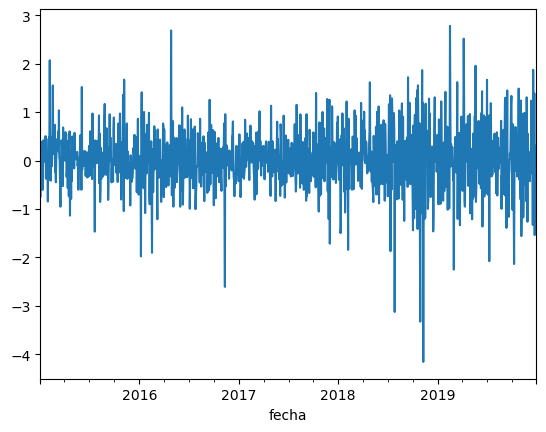

In [29]:
df_amazon['amazon_dif'].plot();

In [32]:
## prueba dickey-fuller aumentada
pruebra_ADF1=adfuller(df_amazon['amazon_dif'].dropna())
pvalue1=pruebra_ADF1[1]
pvalue1.round(2)

0.0

Rechazamos H0, las primeras diferencias de amazon son un proceso estacionario
* amazon integrado I(1)
* las primeras diferencias  integrado I(0)

Ya sabemos que las 1ras diferencias son procesos estacionario ¿que tipo de proceso estacionario son?\ 
* ruido blanco
* AR(p)
* MA(q)
* ARMA(p,q)


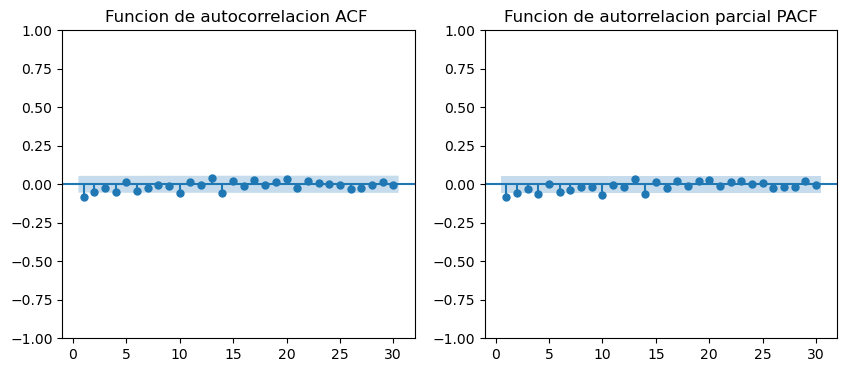

In [36]:
## graficas de autocorrelacion 
ig, ax=plt.subplots(1,2,figsize=(10,4))
## 1er subgrafica
plot_acf(df_amazon['amazon_dif'].dropna(), zero=False, lags=30,ax=ax[0],title='Funcion de autocorrelacion ACF ')
## 2do  subgrafica
plot_pacf(df_amazon['amazon_dif'].dropna(),zero=False,lags=30,ax=ax[1], title='Funcion de autorrelacion parcial PACF')
plt.show()

Hay que comparar con las graficas de como se comportan los distintos procesos estacionarios

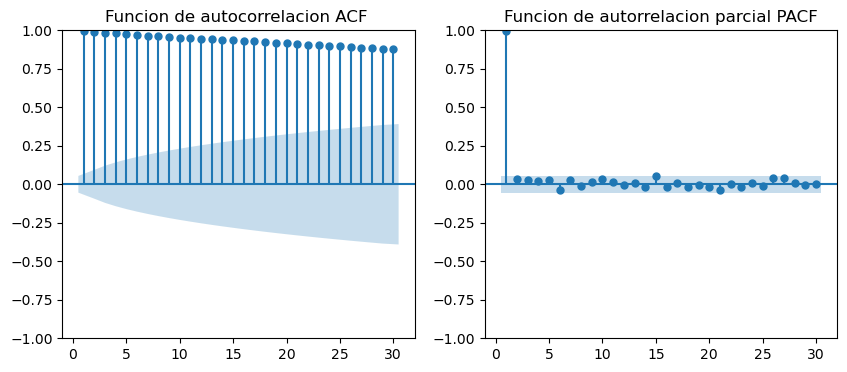

In [38]:
## graficas de autocorrelacion 
ig, ax=plt.subplots(1,2,figsize=(10,4))
## 1er subgrafica
plot_acf(df_amazon['amazon'].dropna(), zero=False, lags=30,ax=ax[0],title='Funcion de autocorrelacion ACF ')
## 2do  subgrafica
plot_pacf(df_amazon['amazon'].dropna(),zero=False,lags=30,ax=ax[1], title='Funcion de autorrelacion parcial PACF')
plt.show()

In [42]:
## suponer que las 1as Diff son un AR(1)=ARMA(1,0,0)
modelo_prueba=ARIMA(df_amazon['amazon_dif'], order=(1,0,0))
resultado=modelo_prueba.fit()
print(resultado.summary())

                               SARIMAX Results                                
Dep. Variable:             amazon_dif   No. Observations:                 1301
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1189.362
Date:                Fri, 20 Oct 2023   AIC                           2384.724
Time:                        15:59:25   BIC                           2400.236
Sample:                    01-02-2015   HQIC                          2390.544
                         - 12-27-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0218      0.016      1.394      0.163      -0.009       0.052
ar.L1         -0.0839      0.023     -3.686      0.000      -0.128      -0.039
sigma2         0.3649      0.008     44.372      0.0

La ecuacion de este modelo AR(1):
$$Y_t=\phi Y_{t-1}+\varepsilon_t=-0.083 y_{t-1} + \varepsilon_t $$

In [43]:
## vamos a suponer que las 1ras diferencias son un AR(2)=ARMA(2,0)=ARIMA(2,0,0)
modelo_prueba=ARIMA(df_amazon['amazon_dif'], order=(2,0,0))
resultadop=modelo_prueba.fit()
print(resultadop.summary())

                               SARIMAX Results                                
Dep. Variable:             amazon_dif   No. Observations:                 1301
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1187.282
Date:                Fri, 20 Oct 2023   AIC                           2382.565
Time:                        16:04:41   BIC                           2403.248
Sample:                    01-02-2015   HQIC                          2390.325
                         - 12-27-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0218      0.015      1.477      0.140      -0.007       0.051
ar.L1         -0.0886      0.023     -3.803      0.000      -0.134      -0.043
ar.L2         -0.0565      0.026     -2.185      0.0

In [46]:
# vamos a estimar varios modelos y  guardar el AIC BIC
ic = {}
for ar in range(7):
    for ma in range(7):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(df_amazon['amazon_dif'], order=(ar, 0, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]
 
ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2
AR: 0, MA: 3
AR: 0, MA: 4
AR: 0, MA: 5
AR: 0, MA: 6
AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2
AR: 1, MA: 3
AR: 1, MA: 4
AR: 1, MA: 5
AR: 1, MA: 6
AR: 2, MA: 0
AR: 2, MA: 1
AR: 2, MA: 2


c:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 2, MA: 3
AR: 2, MA: 4
AR: 2, MA: 5
AR: 2, MA: 6
AR: 3, MA: 0
AR: 3, MA: 1
AR: 3, MA: 2


c:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 3, MA: 3


c:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 4


c:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 5


c:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 6


c:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 0
AR: 4, MA: 1
AR: 4, MA: 2


c:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 3
AR: 4, MA: 4


c:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 5


c:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 6


c:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 0
AR: 5, MA: 1
AR: 5, MA: 2
AR: 5, MA: 3


c:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 4


c:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 5


c:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 6


c:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 0
AR: 6, MA: 1
AR: 6, MA: 2
AR: 6, MA: 3


c:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 4


c:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 5


c:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 6


c:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [47]:
ic

AIC          BIC
AR MA                          
0  0   2391.896755  2402.238532
   1   2383.568586  2399.081251
   2   2381.083540  2401.767094
   3   2381.400733  2407.255175
   4   2378.268578  2409.293909
   5   2380.228629  2416.424848
   6   2376.970678  2418.337786
1  0   2384.723520  2400.236185
   1   2370.719104  2391.402658
   2   2372.424256  2398.278698
   3   2374.423985  2405.449316
   4   2375.974110  2412.170330
   5   2377.699804  2419.066912
   6   2376.746380  2423.284376
2  0   2382.564546  2403.248100
   1   2372.425154  2398.279596
   2   2370.748008  2401.773339
   3   2371.163647  2407.359866
   4   2372.359913  2413.727021
   5   2374.217857  2420.755853
   6   2375.972759  2427.681644
3  0   2383.194967  2409.049409
   1   2374.421792  2405.447123
   2   2371.035777  2407.231997
   3   2376.123211  2417.490319
   4   2375.741697  2422.279694
   5   2376.341073  2428.049958
   6   2375.924611  2432.804384
4  0   2380.417047  2411.442378
   1   2375.937829  2412.134048
   2   2372.271727  2413.638835
   3   2378.253598  2424.791594
   4   2375.727702  2427.436587
   5   2376.367379  2433.247152
   6   2377.029057  2439.079718
5  0   2382.415993  2418.612212
   1   2377.636683  2419.003790
   2   2374.187362  2420.725358
   3   2379.993426  2431.702310
   4   2375.185989  2432.065762
   5   2378.554978  2440.605640
   6   2378.533696  2445.755246
6  0   2380.759590  2422.126698
   1   2376.897286  2423.435282
   2   2378.891160  2430.600045
   3   2376.195032  2433.074805
   4   2377.588726  2439.639387
   5   2381.565741  2448.787291
   6   2380.747499  2453.139938

In [49]:
ic.sort_values('AIC').head()

,,AIC,BIC
AR,MA,,
1,1,2370.719104,2391.402658
2,2,2370.748008,2401.773339
3,2,2371.035777,2407.231997
2,3,2371.163647,2407.359866
4,2,2372.271727,2413.638835


ARIMA (p, I(d) , q)
* 1ras diferencias son un ARMA(1,1)=ARIMA(1,0,1)
* amazon ARIMA(1,1,1)

Amazon tiene el mismo AR y el mismo MA que las primeras diferencias

In [50]:
## 1ras diferencias
pm.auto_arima(df_amazon['amazon_dif'].dropna(),
              start_p=1, max_p=7,
              start_q=1, max_q=7,
              seasonal=False
              )

ARIMA(order=(1, 0, 1), scoring_args={}, suppress_warnings=True)

In [52]:
## amazon
pm.auto_arima(df_amazon['amazon'],
              start_p=1, max_p=7,
              start_q=1, max_q=7,
              ic='bic',
              seasonal=False
              )

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True)

In [53]:
## modelo ARIMA de AMAZON
model=ARIMA(df_amazon['amazon'], order=(1,1,1))
results=model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                 amazon   No. Observations:                 1301
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1183.529
Date:                Fri, 20 Oct 2023   AIC                           2373.058
Time:                        16:22:42   BIC                           2388.569
Sample:                    01-02-2015   HQIC                          2378.878
                         - 12-27-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7500      0.071     10.517      0.000       0.610       0.890
ma.L1         -0.8375      0.059    -14.284      0.000      -0.952      -0.723
sigma2         0.3616      0.008     43.599      0.0

In [54]:
## pronosticar 

df_amazon['pronostico']=results.predict()

In [55]:
df_amazon

,amazon,amazon_dif,pronostico
fecha,,,
2015-01-02,24.573591,NaN,0.000000
2015-01-05,23.830631,-0.742960,24.573591
2015-01-06,24.070295,0.239664,23.884899
2015-01-07,24.453760,0.383465,24.096638
2015-01-08,24.301968,-0.151793,24.444772
...,...,...,...
2019-12-23,52.589653,-1.539211,53.983792
2019-12-24,52.599163,0.009510,52.602725
2019-12-25,52.599163,0.000000,52.609279


In [56]:
## asignar el valor inicial de la serie al pronostico

df_amazon['pronostico'][0]=df_amazon['amazon'][0]

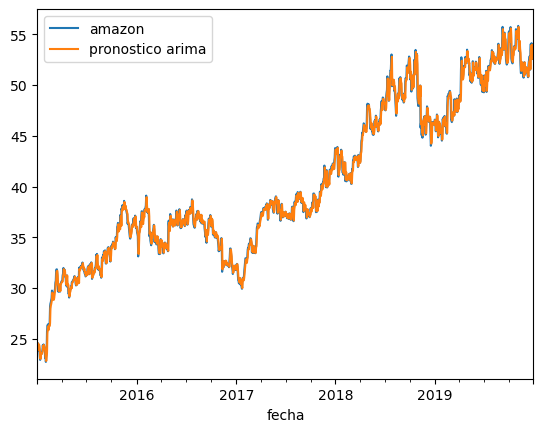

In [60]:
df_amazon['amazon'].plot(label='amazon')
df_amazon['pronostico'].plot(label='pronostico arima')
plt.legend()


In [61]:
#predecir futuro

results.predict(start='2019-12-28', end='2020-01-28')

2019-12-30    52.847340
2019-12-31    52.833947
2020-01-01    52.823902
2020-01-02    52.816367
2020-01-03    52.810716
2020-01-06    52.806478
2020-01-07    52.803299
2020-01-08    52.800914
2020-01-09    52.799126
2020-01-10    52.797785
2020-01-13    52.796778
2020-01-14    52.796024
2020-01-15    52.795458
2020-01-16    52.795033
2020-01-17    52.794715
2020-01-20    52.794476
2020-01-21    52.794297
2020-01-22    52.794163
2020-01-23    52.794062
2020-01-24    52.793986
2020-01-27    52.793930
2020-01-28    52.793887
Freq: B, Name: predicted_mean, dtype: float64

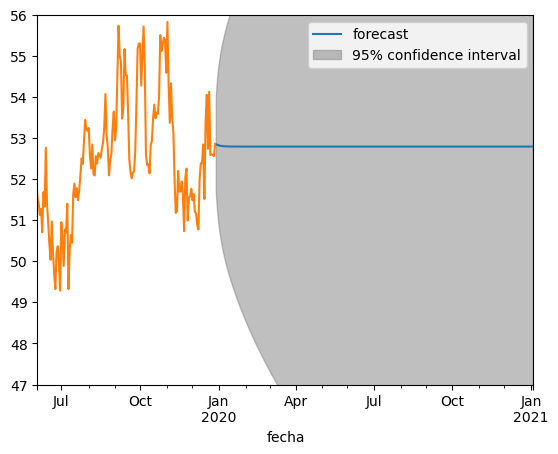

In [68]:
plot_predict(results, start='2019-12-28',end='2021-01-05')
df_amazon['amazon'].plot()
plt.ylim(47,56)
plt.xlim('2019-06-01','2021-01-05');

Los modelos ARIMA son modelo de pronostico a corto plazo. Conforme mas se pronostica a futuro el intervalo de confianza se vuelve mas grande , es decir, entre mas se pronostique a futuro el modelo se va a equivocar mas.\ Tambien a partir de cierto periodo el modelo ARIMA pronostica una constante, esto es porque el modelo no puede ver ese futuro.\
Por eso es que decimos que los modelos ARIMA son modelos para pronosticos de corto plazo.En general si tenemos un ARIMA (2,1,1) se considera que el modelo puede hacer un buen pronostico de dos periodos, si tenemos una ARIMA (3,0,1) se considera que se hace un buen pronostico de 3 periodos, si tenemos una ARIMA (1,1,3)se considera que se hace un buen pronostico de 3 periodos.

In [74]:
results.predict(start='2019-12-28',end='2019-12-30')

2019-12-30    52.84734
Freq: B, dtype: float64

In [70]:
ultima_obs

fecha     2019-12-30 00:00:00
amazon              51.478008
Name: 1254, dtype: object